# Text Classification of StackOverflow using  Embeddings Centroids Vectors

In [1]:
import sys
import os
from os import pardir, getcwd
from os.path import join, abspath
PARENT_DIRECTORY = abspath(join(getcwd(), pardir))
sys.path.insert(0, PARENT_DIRECTORY)

import warnings
import sklearn.exceptions
import talos as ta
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

from definitions import  TALOS_DIR
from app.preprocessing import load_dataset, load_embeddings, preprocess_data
from app.models import load_model, find_best_model_over_scan_logs


Using TensorFlow backend.


## Preprocessing for the loaded Dataset
1. Remove *punctuation* characters
2. Remove *stopwords*
3. Remove *links*
4. Remove *Numbers*
5. Format into *lowercase*

In [2]:
data = load_dataset(load_from_pickle=True)
Classes = list(data['tags'].value_counts().index)
Nclasses = len(Classes)
print(data['tags'].value_counts())
print(data['post'][0])

sql              2000
ruby-on-rails    2000
android          2000
angularjs        2000
asp.net          2000
c                2000
c#               2000
c++              2000
css              2000
html             2000
ios              2000
iphone           2000
java             2000
javascript       2000
jquery           2000
mysql            2000
objective-c      2000
php              2000
python           2000
.net             2000
Name: tags, dtype: int64
caus behavior c# datetim type <pre><code>[test] public void sadness() { var datetim = datetime.utcnow; assert.that(datetim is.equalto(datetime.parse(datetime.tostring()))); } </code></pre> fail <pre><code> expected: - - : : . was: - - : : . </code></pre> wish know happen behind scene tostring() etc caus behavior. edit see jon answer <pre><code>[test] public void newsadness() { var datetim = datetime.utcnow; assert.that(datetim is.equalto(datetime.parse(datetime.tostring( )))); } </code></pre> result <pre><code>expected: - - : : .

## MLP classifier in Keras using not standardized **embeddings-centroids** features

 ### Hyper parameter tuning for the  model

In [3]:
# 70% Train & 30% Test
# 70% Train-Dev % 30* Train-Dev 
embeddings = load_embeddings(data, 'post', minimized=False)
model_data_ftc = preprocess_data(data, 'tags', 'post',
                                 input_ins='as_centroids',
                                 cv_split_full=0.3,
                                 cv_split_dev=0.3,
                                 embeddings=embeddings)


In [4]:
TALOS_FTC_LOG_FILENAME = 'talos_ftc_log_test'
# TALOS_FTC_LOG_FILENAME = 'talos_ftc_log'
talos_ftc_log_pathname = os.path.join(TALOS_DIR, TALOS_FTC_LOG_FILENAME)


###### Production configuration
ftc_model_config = {
    'visualize_proccess': [False],
    'first_neuron': [128, 256],  # First Layer
    'activation': ['relu', 'tanh'],
    'dropout': [0.2, 0.4, 0.6],
    'number_of_hidden_layers': [2],
    'shapes':['funnel'],
    'epochs': [5, 10, 15],
    'batch_size': [32, 64],
    'model_type': ['keras_embeddings_centroids_model'],
}

history_model_ftc = ta.Scan(model_data_ftc['x_train'],
                            model_data_ftc['y_train'],
                            x_val=model_data_ftc['x_train_dev'],
                            y_val=model_data_ftc['y_train_dev'],
                            model=load_model,
                            params=ftc_model_config,
                            grid_downsample=0.1,
                            print_params=True,
                            seed=(123),
                            dataset_name=talos_ftc_log_pathname
                            )


  0%|          | 0/7 [00:00<?, ?it/s]

{'visualize_proccess': False, 'first_neuron': 256, 'activation': 'relu', 'dropout': 0.6, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 5, 'batch_size': 64, 'model_type': 'keras_embeddings_centroids_model'}
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


 14%|█▍        | 1/7 [00:09<00:59,  9.95s/it]

{'visualize_proccess': False, 'first_neuron': 256, 'activation': 'relu', 'dropout': 0.4, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 15, 'batch_size': 64, 'model_type': 'keras_embeddings_centroids_model'}


 29%|██▊       | 2/7 [00:28<01:03, 12.62s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'tanh', 'dropout': 0.2, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 5, 'batch_size': 32, 'model_type': 'keras_embeddings_centroids_model'}


 43%|████▎     | 3/7 [00:39<00:48, 12.12s/it]

{'visualize_proccess': False, 'first_neuron': 256, 'activation': 'relu', 'dropout': 0.2, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 15, 'batch_size': 64, 'model_type': 'keras_embeddings_centroids_model'}


 57%|█████▋    | 4/7 [00:59<00:43, 14.34s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'relu', 'dropout': 0.6, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 5, 'batch_size': 32, 'model_type': 'keras_embeddings_centroids_model'}


 71%|███████▏  | 5/7 [01:07<00:24, 12.37s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'tanh', 'dropout': 0.6, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 10, 'batch_size': 32, 'model_type': 'keras_embeddings_centroids_model'}


 86%|████████▌ | 6/7 [01:21<00:12, 12.85s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'relu', 'dropout': 0.6, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 10, 'batch_size': 64, 'model_type': 'keras_embeddings_centroids_model'}


100%|██████████| 7/7 [01:32<00:00, 12.35s/it]


    Finds the best model configuration set for the TF-IDF, after the Talos Scanning.

In [5]:
report_ftc = ta.Reporting(history_model_ftc)
best_model_idx = report_ftc.data['val_f1'].idxmax()
best_model_params = report_ftc.data.loc[best_model_idx].to_dict()
best_model_params


{'round_epochs': 5,
 'val_loss': 1.2885455980755034,
 'val_f1': 0.3170331698088419,
 'val_accuracy': 0.9633571077528454,
 'loss': 1.4412892601441365,
 'f1': 0.33725428398774593,
 'accuracy': 0.9600433335985457,
 'visualize_proccess': 'False',
 'first_neuron': 128,
 'activation': 'tanh',
 'dropout': 0.2,
 'number_of_hidden_layers': 2,
 'shapes': 'funnel',
 'epochs': 5,
 'batch_size': 32,
 'model_type': 'keras_embeddings_centroids_model'}

    Train return a TF-IDF Model with the the best configuration set.

In [6]:
# Train and Load the best model of given the tuned featured model
model_ftc_history, model_ftc = load_model(model_data_ftc['x_train'],
                                         model_data_ftc['y_train'],
                                         model_data_ftc['x_train_dev'],
                                         model_data_ftc['y_train_dev'],
                                         best_model_params)

### Visualize Model History Scores

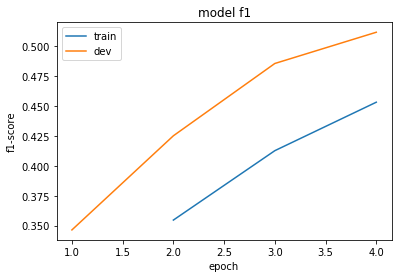

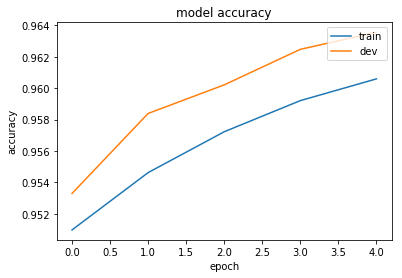

In [7]:
from app.visualization import plot_history_metrics
import matplotlib.pylab as plt

%matplotlib inline
plot_history_metrics(history_obj=model_ftc_history)

### Evaluate performance model

Evaluates the performance of the best trained model in the **test** dataset. 

In [8]:
scoref_ftc = model_ftc.evaluate(model_data_ftc['x_test'],
                           model_data_ftc['y_test'],
                           batch_size=best_model_params['batch_size'],
                           verbose=1)

print('\nTest f1: %.4f' % (scoref_ftc[1]))
print('\nTest accuracy: %.4f'% (scoref_ftc[2]))

12000/12000 [==============================] - 0s 22us/step

Test f1: 0.5138

Test accuracy: 0.9637


### Visualize Prediction Perfomance  model

--------------------------------------------------------------------------------
Accuracy Score: 58.16%
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0      0.631     0.502     0.559       600
           1      0.585     0.492     0.534       600
           2      0.598     0.687     0.639       600
           3      0.585     0.582     0.583       600
           4      0.600     0.780     0.678       600
           5      0.520     0.310     0.388       600
           6      0.706     0.555     0.621       600
           7      0.663     0.860     0.749       600
           8      0.534     0.573     0.553       600
           9      0.374     0.693     0.486       600
          10      0.392     0.252     0.307       600
          11      0.507     0.515     0.511       600
       

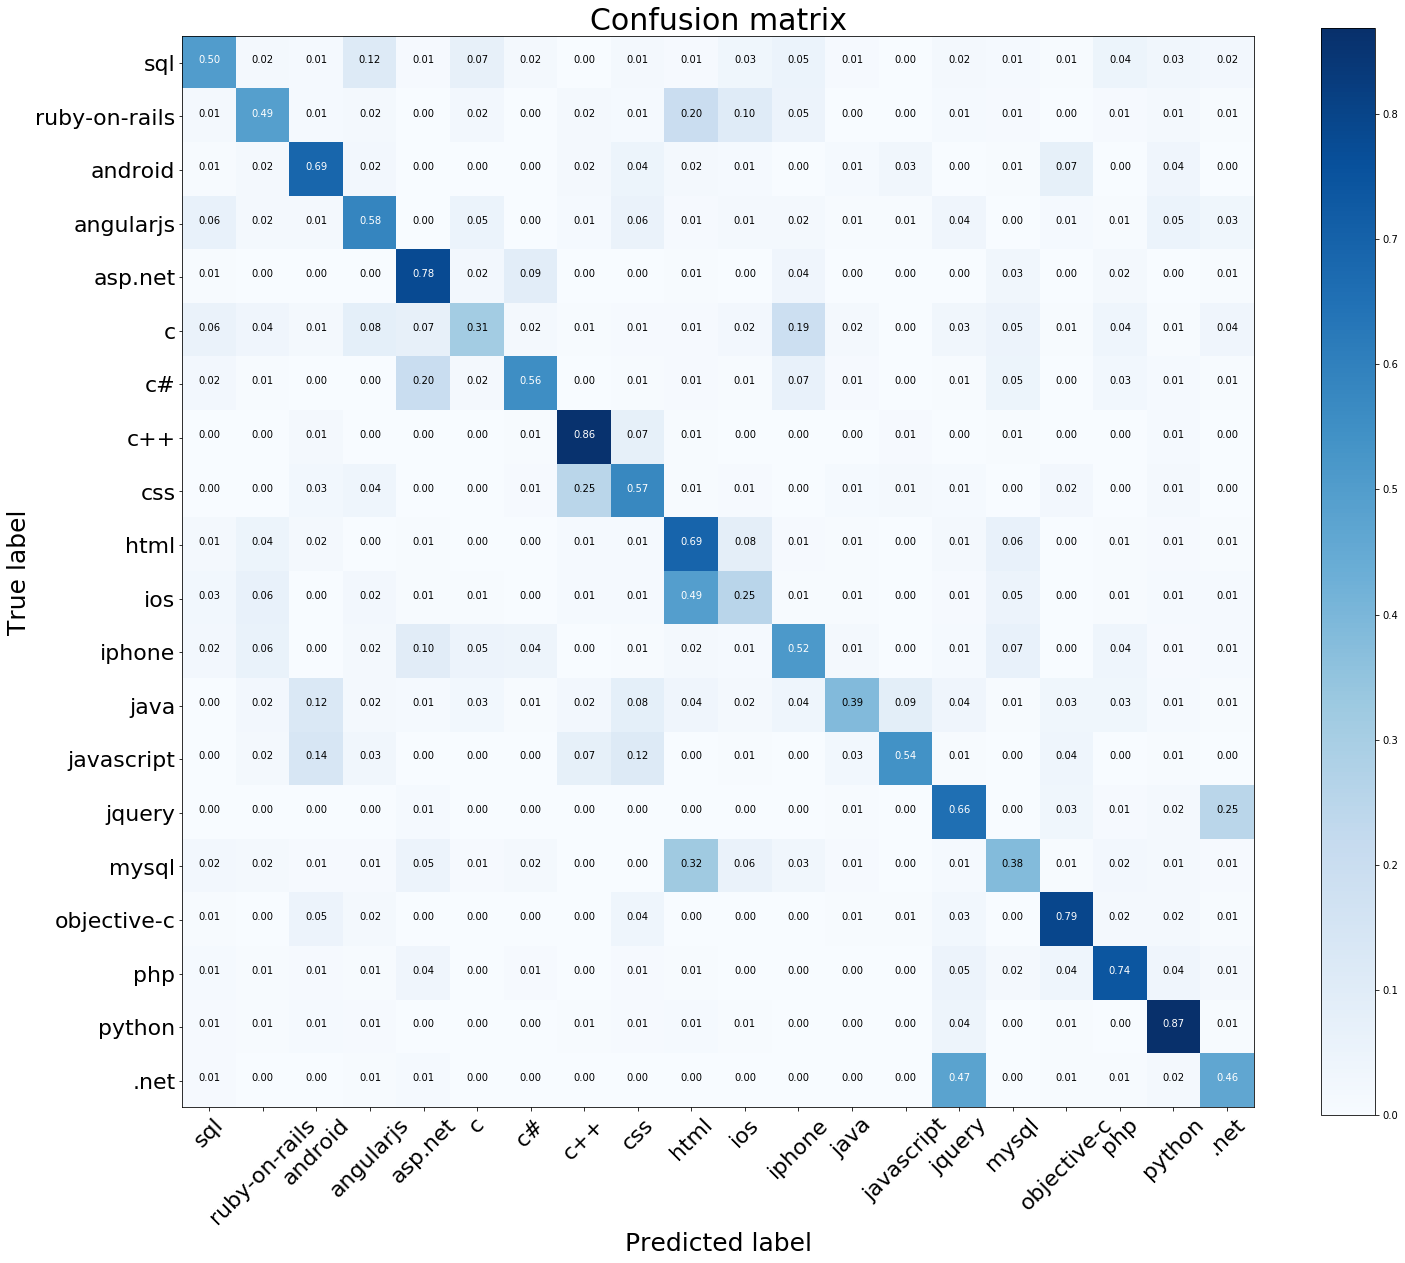

In [12]:
import numpy as np
from app.visualization import (plot_prediction_metrics,
                               create_clf_report,
                               plot_roc_curve,
                               plot_precision_recall_curve,
                               plot_confusion_matrix)
import matplotlib.pylab as plt

prediction_val_ftc = model_ftc.predict(model_data_ftc['x_test'], batch_size=best_model_params['batch_size'])

# returns each entry result to the classification with the relevant probabilities
y_pred_processed_ftc = np.array([np.argmax(val) for val in prediction_val_ftc])
y_true_processed_ftc = np.array([np.argmax(val) for val in model_data_ftc['y_test']])

# If you want to see the OneVSAll ROC Curves of each class uncomment the below line
# plot_roc_curve(model_data_ftc['y_test'], prediction_val_ftc, Classes, 1)

# If you want to see the OneVSAll Precission Recall Curves of each class, comment out the below line
# plot_precision_recall_curve(model_data_ftc['y_test'], prediction_val_ftc, Classes , 1)

# If you want to get the Classification Report, comment out the below line
create_clf_report(y_true_processed_ftc, y_pred_processed_ftc, Classes)

# If you want to get the confusion matrix,comment out the below line
plot_confusion_matrix(y_true_processed_ftc, y_pred_processed_ftc, Classes)

## MLP classifier in Keras using standardized **embeddings-centroids** features

In [16]:
TALOS_SDR_FTC_LOG_FILENAME = 'talos_sdr_ftc_log_test'
# TALOS_SDR_FTC_LOG_FILENAME = 'talos_sdr_ftc_log'
talos_sdr_ftc_log_pathname = os.path.join(TALOS_DIR, TALOS_SDR_FTC_LOG_FILENAME)
from app.models import load_model
    
# Loads the dataset using centroids embeddings but now every word vector has been stardirdized.
model_data_sdr_ftc = preprocess_data(data, 'tags', 'post',
                                     input_ins='as_centroids',
                                     cv_split_full=0.3,
                                     cv_split_dev=0.3,
                                     standardize=True,
                                     embeddings=embeddings)

history_model_sdr_ftc = ta.Scan(model_data_sdr_ftc['x_train'],
                                model_data_sdr_ftc['y_train'],
                                x_val=model_data_sdr_ftc['x_train_dev'],
                                y_val=model_data_sdr_ftc['y_train_dev'],
                                model=load_model,
                                params=ftc_model_config,
                                grid_downsample=0.1,
                                print_params=True,
                                seed=(123)
                                )


  0%|          | 0/7 [00:00<?, ?it/s]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'tanh', 'dropout': 0.6, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 10, 'batch_size': 64, 'model_type': 'keras_embeddings_centroids_model'}



 14%|█▍        | 1/7 [00:08<00:53,  8.90s/it]

{'visualize_proccess': False, 'first_neuron': 256, 'activation': 'relu', 'dropout': 0.2, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 5, 'batch_size': 32, 'model_type': 'keras_embeddings_centroids_model'}



 29%|██▊       | 2/7 [00:18<00:45,  9.14s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'tanh', 'dropout': 0.4, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 5, 'batch_size': 32, 'model_type': 'keras_embeddings_centroids_model'}



 43%|████▎     | 3/7 [00:26<00:34,  8.74s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'relu', 'dropout': 0.6, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 15, 'batch_size': 64, 'model_type': 'keras_embeddings_centroids_model'}



 57%|█████▋    | 4/7 [00:38<00:29,  9.87s/it]

{'visualize_proccess': False, 'first_neuron': 256, 'activation': 'tanh', 'dropout': 0.6, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 15, 'batch_size': 64, 'model_type': 'keras_embeddings_centroids_model'}



 71%|███████▏  | 5/7 [00:54<00:23, 11.70s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'relu', 'dropout': 0.6, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 10, 'batch_size': 64, 'model_type': 'keras_embeddings_centroids_model'}



 86%|████████▌ | 6/7 [01:03<00:10, 10.86s/it]

{'visualize_proccess': False, 'first_neuron': 256, 'activation': 'relu', 'dropout': 0.2, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 15, 'batch_size': 32, 'model_type': 'keras_embeddings_centroids_model'}



100%|██████████| 7/7 [01:30<00:00, 15.59s/it]

    Finds the best model for the Standardized FastText Embeddings Centroids.

In [17]:
report_sdr_ftc = ta.Reporting(history_model_sdr_ftc)

#get best model configuration
best_model_sdr_ftc_idx = report_sdr_ftc.data['val_f1'].idxmax()
best_model_params_sdr_ftc = report_sdr_ftc.data.loc[best_model_sdr_ftc_idx].to_dict()
best_model_params_sdr_ftc

{'round_epochs': 5,
 'val_loss': 1.1640640266736348,
 'val_f1': 0.40163251224018276,
 'val_accuracy': 0.9675237862269084,
 'loss': 1.2431116816462302,
 'f1': 0.42927887692743416,
 'accuracy': 0.9656606901421839,
 'visualize_proccess': 'False',
 'first_neuron': 256,
 'activation': 'relu',
 'dropout': 0.2,
 'number_of_hidden_layers': 2,
 'shapes': 'funnel',
 'epochs': 5,
 'batch_size': 32,
 'model_type': 'keras_embeddings_centroids_model'}

    Trains and fit the MLP Network with the standardized data using the best selected features.

In [18]:
model_sdr_ftc_history, model_sdr_ftc = load_model(model_data_sdr_ftc['x_train'],
                                                  model_data_sdr_ftc['y_train'],
                                                  model_data_sdr_ftc['x_train_dev'],
                                                  model_data_sdr_ftc['y_train_dev'],
                                                  best_model_params_sdr_ftc)

 ### Visualize Model History Scores


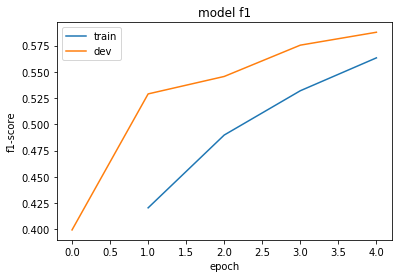

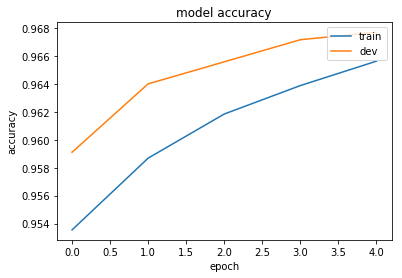

In [19]:
from app.visualization import plot_history_metrics
%matplotlib inline
plot_history_metrics(model_sdr_ftc_history)

### Evaluate performance model

Evaluates the performance of the best trained model in the **test** dataset. 

In [20]:
score_sdr_ftc = model_sdr_ftc.evaluate(model_data_sdr_ftc['x_test'],
                                       model_data_sdr_ftc['y_test'],
                                       batch_size=best_model_params_sdr_ftc['batch_size'],
                                       verbose=1)

print('\nTest f1: %.4f' % (score_sdr_ftc[1]))
print('\nTest accuracy: %.4f'% (score_sdr_ftc[2]))

12000/12000 [==============================] - 0s 25us/step

Test f1: nan

Test accuracy: 0.9500


### Visualize Prediction Perfomance of standardized centroids MLP model

--------------------------------------------------------------------------------
Accuracy Score: 12.79%
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0      0.900     0.105     0.188       600
           1      0.000     0.000     0.000       600
           2      0.367     0.018     0.035       600
           3      0.750     0.035     0.067       600
           4      0.000     0.000     0.000       600
           5      0.120     0.067     0.086       600
           6      0.154     0.003     0.007       600
           7      0.000     0.000     0.000       600
           8      0.000     0.000     0.000       600
           9      0.700     0.012     0.023       600
          10      0.000     0.000     0.000       600
          11      1.000     0.003     0.007       600
       

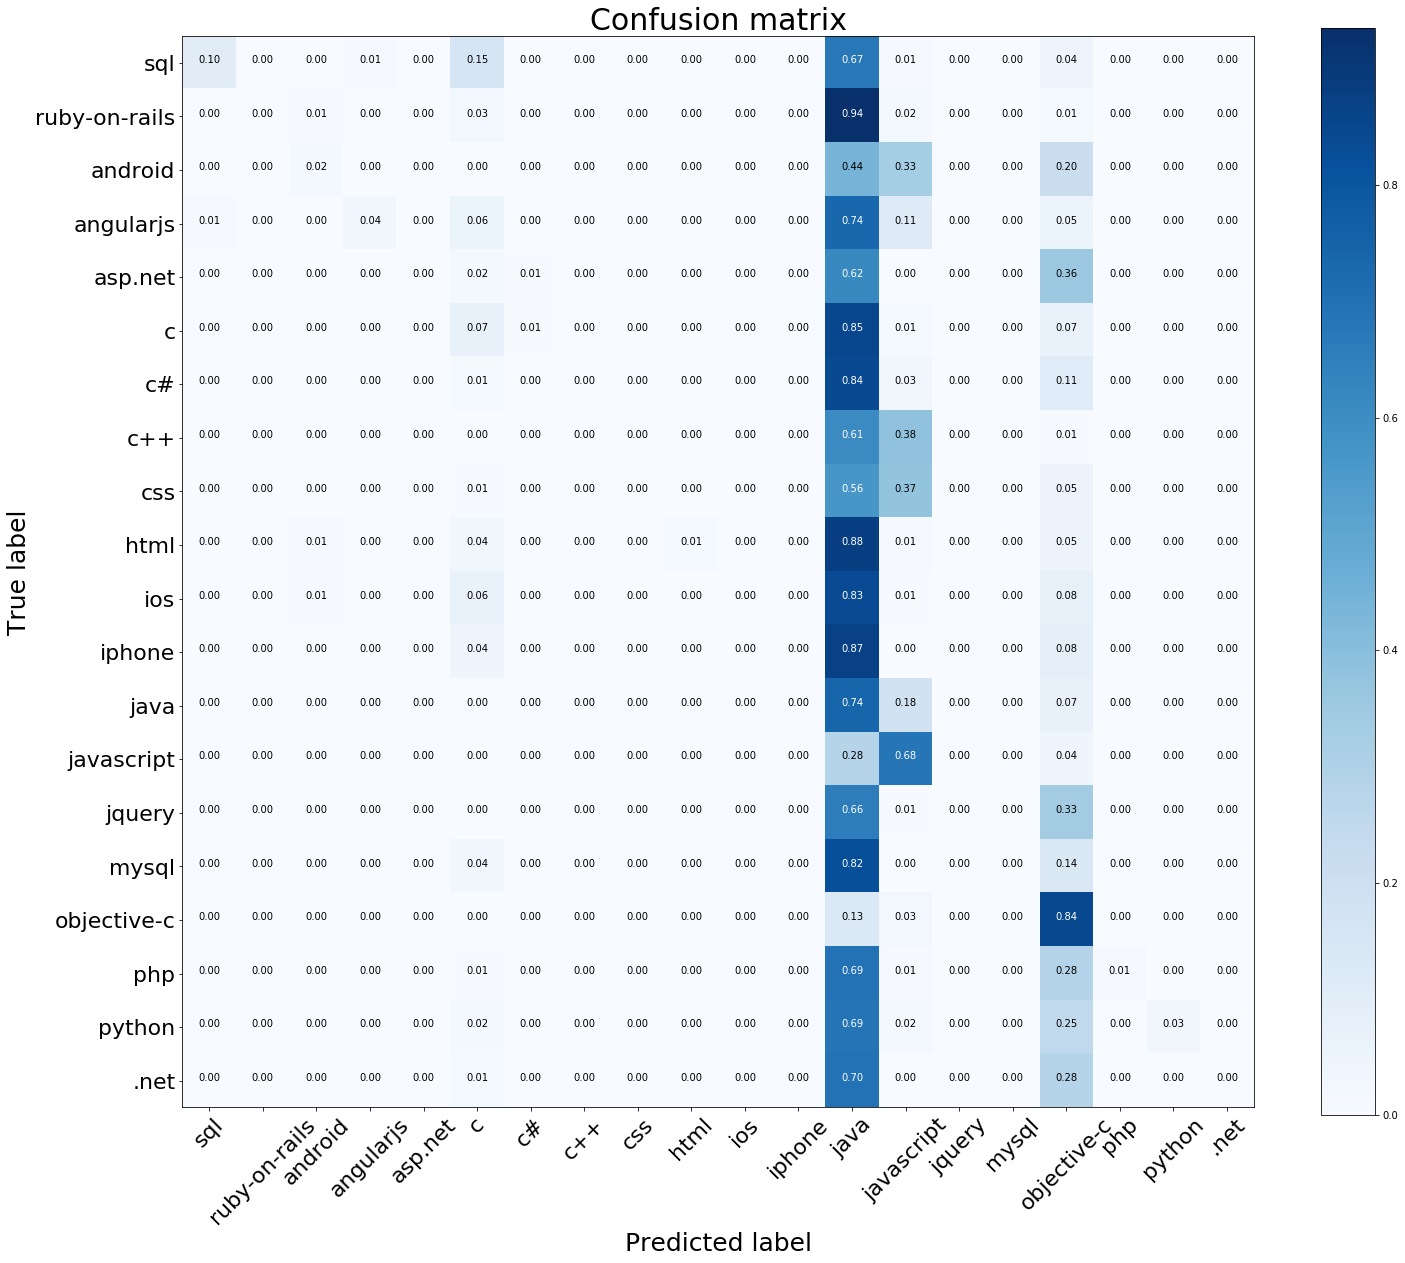

In [22]:
import numpy as np
from app.visualization import (plot_prediction_metrics,
                               create_clf_report,
                               plot_roc_curve,
                               plot_precision_recall_curve)
import matplotlib.pylab as plt

prediction_val_sdr_ftc = model_sdr_ftc.predict(model_data_ftc['x_test'],
                                               batch_size=best_model_params_sdr_ftc['batch_size'])

# returns each entry result to the classification with the relevant probabilities
y_pred_processed_sdr_ftc = np.array([np.argmax(val) for val in prediction_val_sdr_ftc])
y_true_processed_sdr_ftc = np.array([np.argmax(val) for val in model_data_sdr_ftc['y_test']])

# If you want to get the Classification Report, comment out the below line
create_clf_report(y_true_processed_sdr_ftc, y_pred_processed_sdr_ftc, Classes)

# If you want to get the confusion matrix,comment out the below line
plot_confusion_matrix(y_true_processed_sdr_ftc, y_pred_processed_sdr_ftc, Classes)